# Imports

In [ ]:
import numpy as np
import pandas as pd
from pprint import pprint as pp

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

In [2]:
TITLE_CONFIG = {"fontsize":14, "fontweight": "bold"}
LABEL_CONFIG = {"fontsize":11,}

RANDOM_STATE = 42

DATA_PATH = "dataset/hour.csv"
TARGET = 'cnt'

# A. Data Preprocessing and baseline

## 1.  Data Loading and Feature Engineering:

In [3]:
df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


We have **no** `null` values.

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
dteday,17379,731,2011-01-01,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0


In [6]:
drop_cols = ['instant', 'dteday', 'casual', 'registered']
df = df.drop(columns=drop_cols)
print("Columns after drop:")
pp(df.columns.tolist())

Columns after drop:
['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


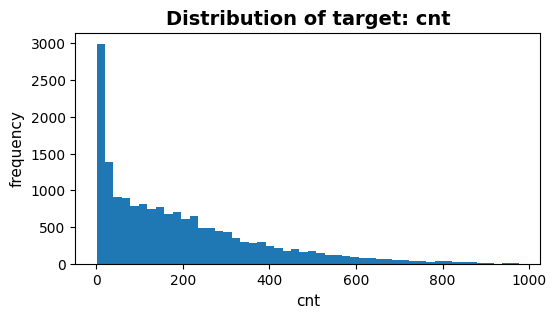

In [8]:
# quick histogram of target
plt.figure(figsize=(6,3))
plt.hist(df[TARGET], bins=50)
plt.title('Distribution of target: cnt', **TITLE_CONFIG)
plt.xlabel('cnt', **LABEL_CONFIG)
plt.ylabel('frequency', **LABEL_CONFIG)
plt.show()

We see that atlest 1 bike is rented.  
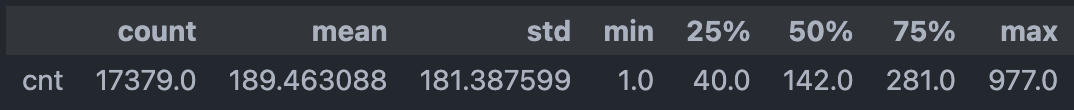

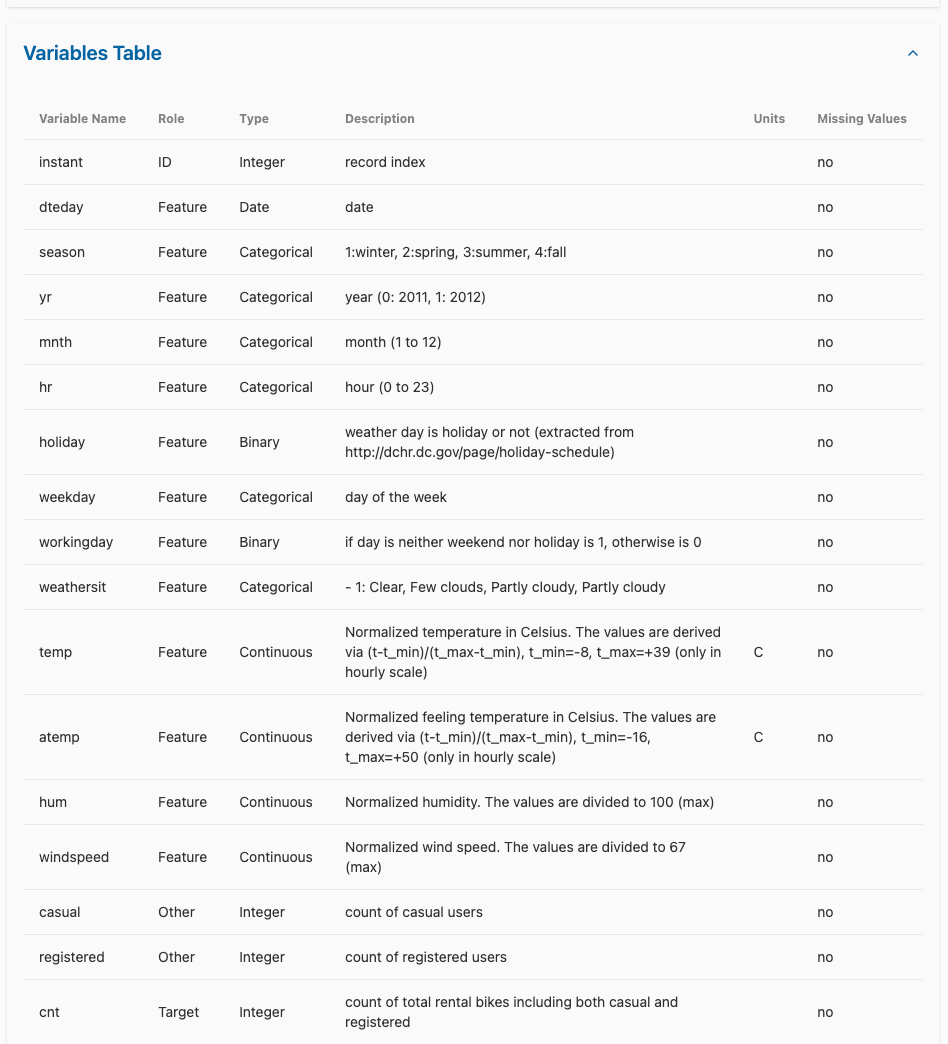

From above table our categorical columns are:
```python
 # these columns are present in the dataframe after dropping some non-informative/irrelevant columns
all_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
# let us select the categorical columns (with more than 2 categories)
categorical_columns = ['season', 'mnth', 'hr', 'weekday', 'weathersit']
```
We encode these categorical columns because we don't want our models to interpret values like `season 4` as being greater than `season 1`. These variables represent distinct categories without any inherent order, so one-hot encoding ensures the model treats them correctly as nominal features.

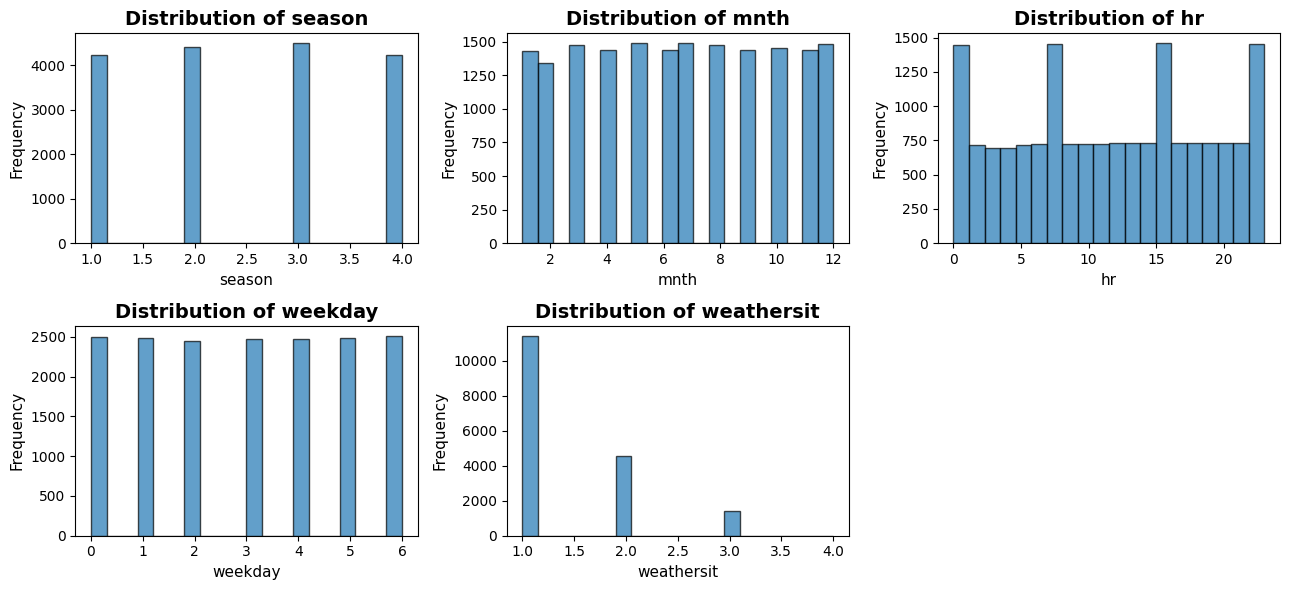

In [9]:
cols = ['season', 'mnth', 'hr', 'weekday', 'weathersit']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 6))
axes = axes.flatten()
for i, col in enumerate(cols):
    df[col].plot(kind='hist', bins=20, ax=axes[i], alpha=0.7, edgecolor='black')
    axes[i].set_title(f"Distribution of {col}", **TITLE_CONFIG)
    axes[i].set_xlabel(col, **LABEL_CONFIG)
    axes[i].set_ylabel("Frequency", **LABEL_CONFIG)

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
categorical_features = ['season', 'mnth', 'hr', 'weekday', 'weathersit']  # convert to one-hot
# we have 'yr', 'holiday' and 'workingday' as binary already in dataset
binary_features = ['yr', 'holiday', 'workingday']
# numeric features: everything else except target, binary_features and categorical_features
numeric_features = [c for c in df.columns if c not in (categorical_features + binary_features + [TARGET])]

print("Categorical features:", categorical_features)
print("Categorical (binary) features:", binary_features)
print("Numeric features:", numeric_features)

# make a preprocessing pipeline:
# OneHotEncode categorical features (drop='first' optional to avoid multicollinearity; we keep all for tree models; for linear we'll standardize)
# standardize numeric features for stability
preprocessor = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ],
    remainder='passthrough',  # keep binary vars as-is
    sparse_threshold=0
)

X = df.drop(columns=[TARGET])
y = df[TARGET].values
preprocessor.fit(X)

X_transformed = preprocessor.transform(X)
print("Transformed feature matrix shape:", X_transformed.shape)


Categorical features: ['season', 'mnth', 'hr', 'weekday', 'weathersit']
Categorical (binary) features: ['yr', 'holiday', 'workingday']
Numeric features: ['temp', 'atemp', 'hum', 'windspeed']
Transformed feature matrix shape: (17379, 58)


## 2. Train/Test Split:


In [11]:
# this dataset is hourly and ordered; to avoid leakage we keep chronological split
# we use the first 90% rows for training and the final 10% for testing

n = len(df)
train_size = int(0.9 * n)
print(f"Total samples: {n}, train: {train_size}, test: {n - train_size}")

X_train_df = X.iloc[:train_size].copy()
y_train = y[:train_size].copy()
X_test_df = X.iloc[train_size:].copy()
y_test = y[train_size:].copy()

# fit the preprocessor on the training data
preprocessor.fit(X_train_df)

# transform using the preprocessor fitted earlier
X_train = preprocessor.transform(X_train_df)
X_test = preprocessor.transform(X_test_df)

print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)

Total samples: 17379, train: 15641, test: 1738
X_train shape: (15641, 58) X_test shape: (1738, 58)


## 3. Baseline Model:

In [12]:
def rmse(true, preds):
    return np.sqrt(mean_squared_error(true, preds))

In [36]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=6, random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
rmse_dt = rmse(y_test, y_pred_dt)
print(f"Decision Tree (max_depth=6) RMSE: {rmse_dt:.4f}")

Decision Tree (max_depth=6) RMSE: 149.4556


In [50]:
dt20 = DecisionTreeRegressor(max_depth=20, random_state=RANDOM_STATE)
dt20.fit(X_train, y_train)
y_pred_dt20 = dt20.predict(X_test)
rmse_dt20 = rmse(y_test, y_pred_dt20)
print(f"Decision Tree (max_depth=20) RMSE: {rmse_dt20:.4f}")

Decision Tree (max_depth=20) RMSE: 102.3065


We can get better results if depth is increased.

In [34]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = rmse(y_test, y_pred_lr)
print(f"Linear Regression RMSE: {rmse_lr:.4f}")

Linear Regression RMSE: 116.1025


In [38]:
# Baseline selection: choose the better of the two (lower RMSE)
if rmse_dt < rmse_lr:
    baseline_model_name = "Decision Tree (max_depth=6)"
    baseline_rmse = rmse_dt
else:
    baseline_model_name = "Linear Regression"
    baseline_rmse = rmse_lr

print(f"Selected baseline: {baseline_model_name} with RMSE = {baseline_rmse:.4f}")

Selected baseline: Linear Regression with RMSE = 116.1025


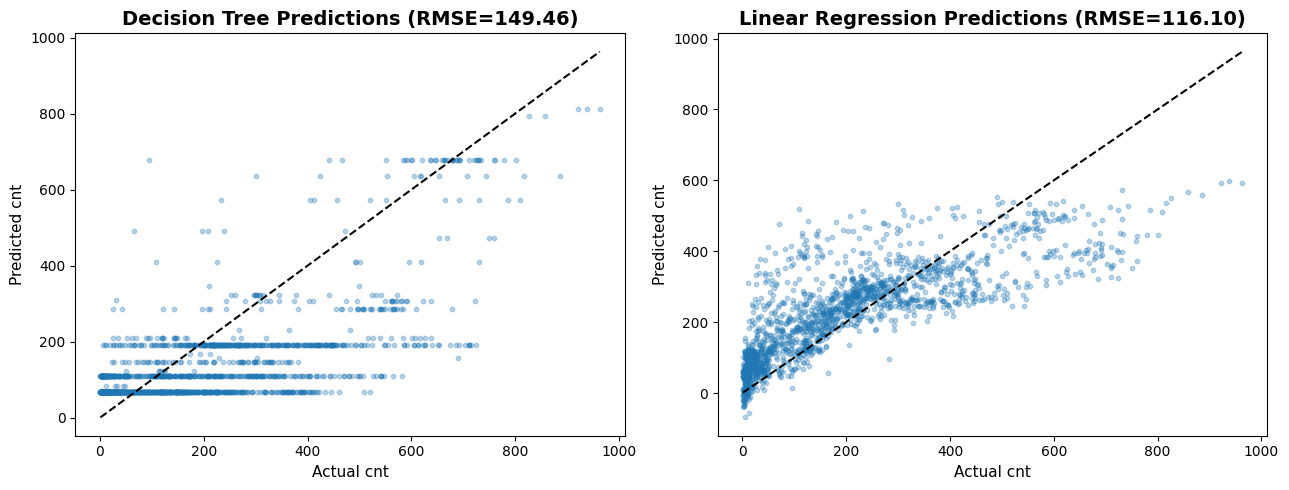

In [39]:
# Part A.7 - Quick diagnostics plots for both models (predicted vs actual on test set)
plt.figure(figsize=(13, 5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_dt, alpha=0.3, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual cnt", **LABEL_CONFIG)
plt.ylabel("Predicted cnt", **LABEL_CONFIG)
plt.title(f"Decision Tree Predictions (RMSE={rmse_dt:.2f})", **TITLE_CONFIG)

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_lr, alpha=0.3, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual cnt", **LABEL_CONFIG)
plt.ylabel("Predicted cnt", **LABEL_CONFIG)
plt.title(f"Linear Regression Predictions (RMSE={rmse_lr:.2f})", **TITLE_CONFIG)

plt.tight_layout()
plt.show()


+ The **decision tree** predictions match the expected prediction trend of discrete predictions due to it's thresholding nature of training. 
+ The **linear regression** predictions are relatively more continuous, showing a slight bias by predicting a bit higher where actual labels are in the range 0-200.

From the RMSE, decision tree is a bit more biased as compared to Linear Regression. So we choose `LinearRegression` as the baseline model.

# B. Ensemble Techniques for Bias and Variance Reduction

## 1. Bagging (Variance Reduction):

In [43]:
# bagging: decision tree base estimator
# hypothesis: bagging should reduce variance compared to a single tree
from sklearn.tree import DecisionTreeRegressor

# single decision tree baseline (max_depth=6)
single_dt = DecisionTreeRegressor(max_depth=6, random_state=RANDOM_STATE)
single_dt.fit(X_train, y_train)
y_train_dt = single_dt.predict(X_train)
y_test_dt  = single_dt.predict(X_test)
rmse_train_dt = rmse(y_train, y_train_dt)
rmse_test_dt  = rmse(y_test, y_test_dt)
print(f"single Decision Tree (max_depth=6) -> train RMSE: {rmse_train_dt:.4f}, test RMSE: {rmse_test_dt:.4f}")

# now Bagging with the same base estimator
# using n_estimators = 80 estimators
n_estimators = 80
bag = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=6), # we need to increase the depth for good performance, and use the power of bagging
    n_estimators=n_estimators,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
bag.fit(X_train, y_train)
y_train_bag = bag.predict(X_train)
y_test_bag  = bag.predict(X_test)
rmse_train_bag = rmse(y_train, y_train_bag)
rmse_test_bag  = rmse(y_test, y_test_bag)

print(f"bagging (80 trees) -> train RMSE: {rmse_train_bag:.4f}, test RMSE: {rmse_test_bag:.4f}")

# brief printed comparison
print("\nsummary (Decision Tree vs Bagging):")
print(f"  single tree test RMSE: {rmse_test_dt:.4f}")
print(f"  bagging test RMSE:     {rmse_test_bag:.4f}")


single Decision Tree (max_depth=6) -> train RMSE: 115.9138, test RMSE: 149.4556
bagging (80 trees) -> train RMSE: 110.3625, test RMSE: 146.0659

summary (Decision Tree vs Bagging):
  single tree test RMSE: 149.4556
  bagging test RMSE:     146.0659


Bagging **slightly reduced the test RMSE** from **149.46 → 146.07**, indicating a **modest reduction in variance** compared to the single Decision Tree.
The improvement is small, suggesting that while ensemble averaging helped stabilize predictions, the **base trees might still be underfitting**, limiting the overall variance reduction benefit.

## 2. Boosting (Bias Reduction):

In [44]:
# boosting: gradient boosting regressor
# hypothesis: boosting reduces bias -> we expect lower train and (possibly) test RMSE vs single models
gbr = GradientBoostingRegressor(
    n_estimators=200,      # more estimators to let boosting converge
    learning_rate=0.1,
    max_depth=3,
    random_state=RANDOM_STATE
)
gbr.fit(X_train, y_train)
y_train_gbr = gbr.predict(X_train)
y_test_gbr  = gbr.predict(X_test)

rmse_train_gbr = rmse(y_train, y_train_gbr)
rmse_test_gbr  = rmse(y_test, y_test_gbr)

print(f"gradient boosting -> train RMSE: {rmse_train_gbr:.4f}, test RMSE: {rmse_test_gbr:.4f}")

gradient boosting -> train RMSE: 63.8633, test RMSE: 86.9171


In [45]:
# compare Bagging vs Boosting on test set
print("\ncomparison (test RMSE):")
print(f"  Bagging test RMSE:   {rmse_test_bag:.4f}")
print(f"  Boosting test RMSE:  {rmse_test_gbr:.4f}")


comparison (test RMSE):
  Bagging test RMSE:   146.0659
  Boosting test RMSE:  86.9171


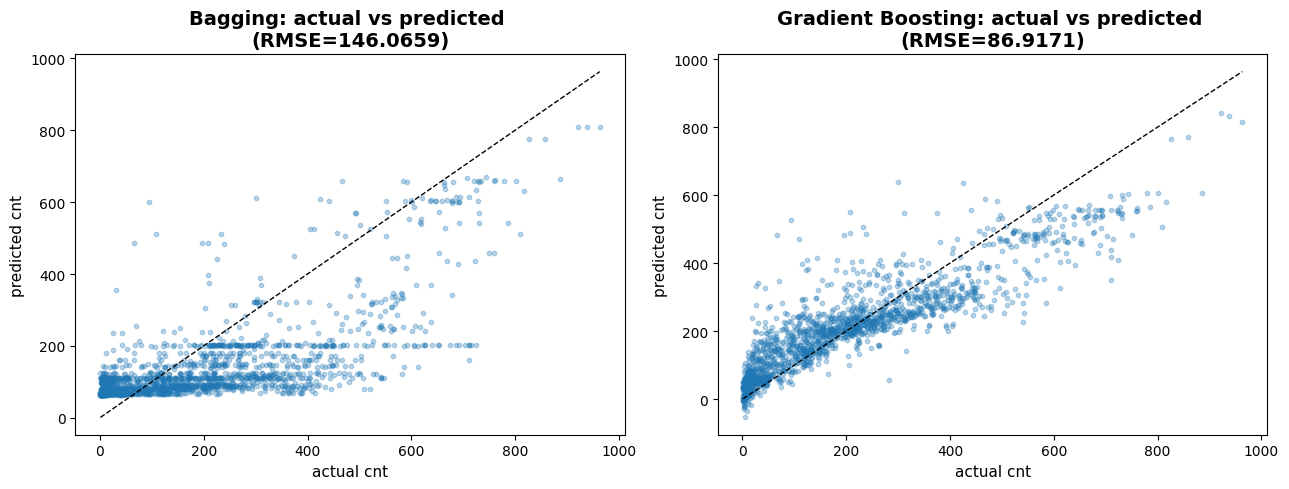

In [46]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_test_bag, alpha=0.3, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=1)
plt.xlabel("actual cnt", **LABEL_CONFIG)  # small casual label capitalization
plt.ylabel("predicted cnt",**LABEL_CONFIG)
plt.title(f"Bagging: actual vs predicted \n(RMSE={rmse_test_bag:.4f})", **TITLE_CONFIG)

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_gbr, alpha=0.3, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=1)
plt.xlabel("actual cnt", **LABEL_CONFIG)
plt.ylabel("predicted cnt",**LABEL_CONFIG)
plt.title(f"Gradient Boosting: actual vs predicted \n(RMSE={rmse_test_gbr:.4f})", **TITLE_CONFIG)

plt.tight_layout()
plt.show()

In [47]:
models_summary = {
    "single_tree": (rmse_train_dt, rmse_test_dt),
    "bagging":     (rmse_train_bag, rmse_test_bag),
    "boosting":    (rmse_train_gbr, rmse_test_gbr)
}

print("model        | train_RMSE | test_RMSE")
print("-------------------------------------")
for name,(tr,te) in models_summary.items():
    print(f"{name:12s} | {tr:10.4f} | {te:9.4f}")


model        | train_RMSE | test_RMSE
-------------------------------------
single_tree  |   115.9138 |  149.4556
bagging      |   110.3625 |  146.0659
boosting     |    63.8633 |   86.9171


The **Gradient Boosting Regressor** achieved a **test RMSE of 86.92**, which is **significantly lower** than the **Linear Regression (116.10)**, **Decision Tree (149.4556)** and the **Bagging Regressor (146.07)**.
This clearly shows that **boosting outperformed both the single model(s) and the bagging ensemble**.

The improvement supports the principle that **boosting reduces bias** by iteratively focusing on errors made by previous learners.
While Bagging primarily reduces variance through model averaging, Boosting’s sequential error correction allows it to **capture more complex, non-linear relationships**, leading to a **lower bias and better generalization** on this regression task.


# C. Stacking for Optimal Performance

## 1. Stacking Implementation:

**Stacking** combines predictions from multiple diverse base learners to build a stronger overall model.
Each base learner (Level-0) makes its own predictions, which are then used as inputs for a **Meta-Learner** (Level-1).
The meta-learner learns how to **weight and combine** these predictions optimally, leveraging each model’s strengths while minimizing their individual weaknesses.  

In this assignment, the **Base Learners (Level-0)** are:
* **K-Nearest Neighbors Regressor (KNN)** – captures local similarity patterns,
* **Bagging Regressor** – reduces variance using multiple decision trees,
* **Gradient Boosting Regressor** – reduces bias through sequential learning.  

The **Meta-Learner (Level-1)** is a **Ridge Regression model**, which learns the optimal way to combine the predictions from these base learners into a final, more accurate output.

In [48]:
# Define Level-0 learners:
#  - KNeighborsRegressor (k=5 default)
#  - BaggingRegressor (the same bag object above)
#  - GradientBoostingRegressor (the same gbr object above)

# StackingRegressor expects estimators as (name, estimator) tuples
knn = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
bag_for_stack = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=6), n_estimators=80, random_state=RANDOM_STATE, n_jobs=-1)
gbr_for_stack = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=RANDOM_STATE)

# meta-learner: Ridge Regression (simple linear model with L2 regularization)
meta_learner = Ridge(alpha=1.0, random_state=RANDOM_STATE)

# assemble stacking regressor
# use cv=5 for generating out-of-fold predictions for the meta-learner
stack = StackingRegressor(
    estimators=[('knn', knn), ('bag', bag_for_stack), ('gbr', gbr_for_stack)],
    final_estimator=meta_learner,
    cv=8,
    n_jobs=-1,
    passthrough=False  # do not pass original features to meta-learner; only pass base predictions
)

# fit stacking regressor
print("fitting stacking regressor (this may take a little while)...")
stack.fit(X_train, y_train)

# predict on test set
y_pred_stack = stack.predict(X_test)
rmse_stack = rmse(y_test, y_pred_stack)
print(f"Stacking regressor test RMSE: {rmse_stack:.4f}")

fitting stacking regressor (this may take a little while)...
Stacking regressor test RMSE: 81.7917


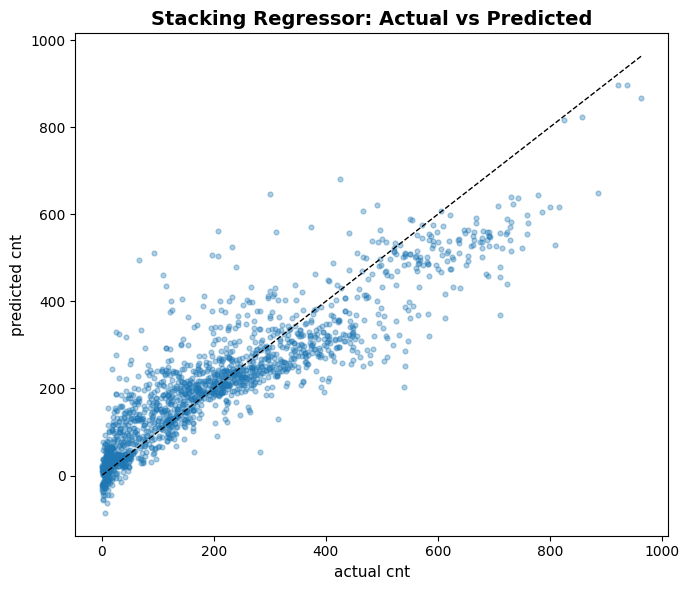

In [49]:
# scatter plot actual vs predicted for stacking
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_stack, alpha=0.35, s=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=1)
plt.xlabel("actual cnt", **LABEL_CONFIG)
plt.ylabel("predicted cnt", **LABEL_CONFIG)
plt.title("Stacking Regressor: Actual vs Predicted", **TITLE_CONFIG)
plt.tight_layout()
plt.show()

## 2. Final Evaluation:

In [25]:
# print a neat comparison table for baseline, bagging, boosting, stacking
results = {
    baseline_model_name: baseline_rmse,
    "Bagging (80 trees)": rmse_test_bag,
    "GradientBoosting": rmse_test_gbr,
    "Stacking (KNN + Bag + GBR -> Ridge)": rmse_stack
}

print("Model                                | test RMSE")
print("------------------------------------------------")
for name, val in results.items():
    print(f"{name:36s} | {val:9.4f}")


Model                                | test RMSE
------------------------------------------------
Linear Regression                    |  116.1025
Bagging (80 trees)                   |  146.0659
GradientBoosting                     |   86.9171
Stacking (KNN + Bag + GBR -> Ridge)  |   81.7917


**Stacking principle:**  
base learners (level-0) learn diverse views of the data (knn for local similarity, bagging trees for variance-reduced nonlinear splits, gbr for sequential bias reduction).  
the meta-learner (ridge) sees the out-of-fold predictions from those base learners and learns optimal linear combination (with L2 regularization) to reduce generalization error.  

Stacking test RMSE lower than each base model's test RMSE, because the meta-learner leverages complementary strengths of base learners.  
If stacking underperforms, it can be due to: insufficient diversity, overfitting of base learners, or meta-learner not having enough signal from out-of-fold predictions.


In [26]:
meta_model = stack.final_estimator_
meta_weights = pd.DataFrame({
    "Base Learner": [name for name, _ in stack.estimators],
    "Weight": meta_model.coef_
}).sort_values("Weight", ascending=False)
display(meta_weights.style.format({"Weight": "{:.4f}"}))


,Base Learner,Weight
2,gbr,1.0609
0,knn,0.1072
1,bag,-0.0574


This tells us that the meta-learner primarily focused on Gradient Boosting, using KNN for fine-tuning and down-weighting Bagging’s influence to achieve optimal bias–variance balance.

# D. Final Analysis

## 1. Comparative Table:

In [28]:
results_dict = {
    baseline_model_name: baseline_rmse,
    "Bagging (80 trees)": rmse_test_bag,
    "GradientBoosting": rmse_test_gbr,
    "Stacking (KNN+Bag+GBR→Ridge)": rmse_stack
}

results_df = pd.DataFrame(list(results_dict.items()), columns=["Model", "Test_RMSE"]).sort_values("Test_RMSE", ascending=True)
display(results_df.style.format({"Test_RMSE": "{:.4f}"}).hide(axis='index'))


Model,Test_RMSE
Stacking (KNN+Bag+GBR→Ridge),81.7917
GradientBoosting,86.9171
Linear Regression,116.1025
Bagging (80 trees),146.0659


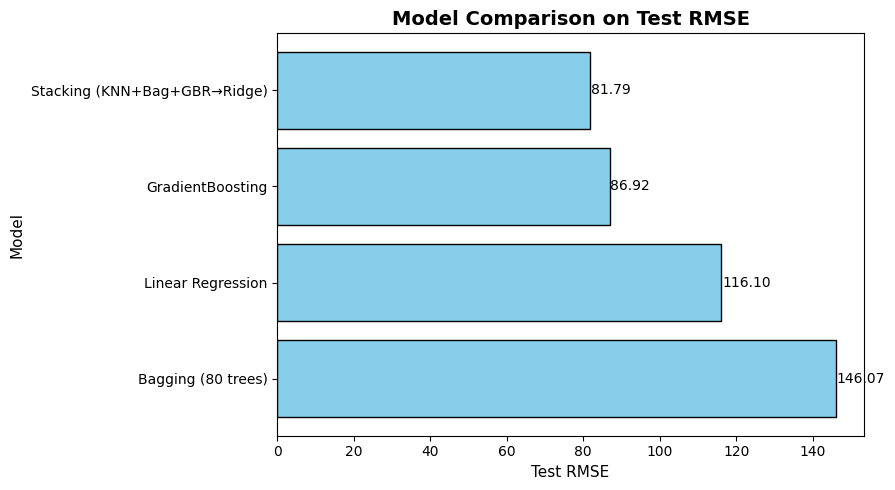

In [29]:
# bar chart comparing RMSE values
plt.figure(figsize=(9, 5))
plt.barh(results_df["Model"], results_df["Test_RMSE"], color="skyblue", edgecolor="k")
plt.xlabel("Test RMSE", **LABEL_CONFIG)
plt.ylabel("Model", **LABEL_CONFIG)
plt.title("Model Comparison on Test RMSE", **TITLE_CONFIG)
plt.gca().invert_yaxis()  # lowest RMSE at top
for i, val in enumerate(results_df["Test_RMSE"]):
    plt.text(val + 0.2, i, f"{val:.2f}", va='center', fontsize=10)
plt.tight_layout()
plt.show()


In [30]:
best_model_name = results_df.iloc[0]["Model"]
best_rmse_value = results_df.iloc[0]["Test_RMSE"]
print(f"Best performing model: {best_model_name} (RMSE = {best_rmse_value:.4f})")

Best performing model: Stacking (KNN+Bag+GBR→Ridge) (RMSE = 81.7917)


## 2. Conclusion:

* **Best Performing Model:**

  * The **Stacking Regressor (KNN + Bagging + Gradient Boosting → Ridge)** achieved the **lowest Test RMSE = 81.79**, outperforming all other models.
  * This demonstrates how **diverse base learners** combined through a **meta-learner** can effectively balance **bias and variance**, leading to better generalization.

* **Gradient Boosting (RMSE = 86.92):**

  * Performed second best, consistent with its design to **reduce bias** by iteratively correcting errors from prior models.
  * It captures complex, non-linear relationships but may still retain some variance from overfitting if not perfectly tuned.

* **Linear Regression (RMSE = 116.10):**

  * Despite its simplicity, it performed **better than Bagging**.
  * Linear models have **high bias but very low variance**, and in this case, their stability likely produced more consistent predictions than an underfit or overly constrained bagging ensemble.

* **Bagging Regressor (RMSE = 146.07):**

  * Performed the worst, suggesting that while **bagging reduces variance**, the **base estimators (Decision Trees)** might have been too shallow or not diverse enough, leading to **high bias**.
  * Bagging’s advantage is limited when the base learners themselves underfit the data.

* **Bias–Variance Comparison:**

  * **Bagging: lowers variance** but may leave bias high if individual learners are weak.
  * **Boosting: lowers bias** by focusing on difficult examples.
  * **Stacking: optimally balances both** by learning how much to trust each base model’s predictions.

### **Key Takeaway:**  
In this case **Stacking** successfully integrated low-bias and low-variance learners, achieving the most robust and accurate predictions.



# Thank you!